# Neuronale Netze und Informationstheorie

Obgleich der Erfolg von neuronalen Netzen ungebrochen scheint, sind die internen Funktionsweisen weitgehend unbekannt.

Einen möglichen Erklärungsansatz und ein theoretisches Modell der Dynamiken der Lernprozesse in Deep Neural Networks (DNN) wurde in jüngster Zeit von Naftali Tishby und verschiedenen weiteren Autoren in mehreren Veröffentlichungen geliefert. [1][2]

Basierend auf der Information Bottleneck Theorie wird der Informationsgehalt eines DNN bestimmt und in Relation zu den Eingabe-/Ausgabedaten gesetzt. Tishby verspricht sich davon ein tiefergehendes Verständnis der internen Funktionsweisen und die Bereitstellung eines universellen Frameworks zur Analyse und Bewertung eines trainierten DNN.


## Grundlagen

Tishby et al betrachtet ein neuronales Netz als eine Markov-Chain...
Jede Schicht wird als Zufallsgröße $T$ betrachtet, beschrieben durch ihre Encoder $P(T|X)$ und Decoder $P(Y|T)$ Verteilungen. 

### Entropie 

Grundlage der Informationstheorie ist die von Claude Shannon beschriebene Entropie. Die Entropie beschreibt, vereinfacht gesagt, die Ungewissheit eines Ereignisses. Je vorhersehbarer ein Ereignis ist, desto geringer ist auch die Entropie. Die Entropie wird daher auch manchmal als "Überraschungswert" bezeichnet. 

$H=-\sum_{i=1}^{n}p_i \cdot log_2 \cdot p_i$

Zur Berechnung der Entropie bildet man obige Summe. $p_i$ steht in diesem Fall für die Wahrscheinlichkeit der einzelnen Ereignisse. 



### Transinformation



Auf Grundlage der Entropie kann die Transinformation definiert werden. Die Transinformation stellt ein Maß dar, wie sehr eine Zufallsgröße von der anderen abhängt. 

## Information Bottleneck

## Information Plane

Dargestellt werden die errechneten Informationen auf der sogenannten Information Plane. Darauf können die Transinformationen der einzelnen Schichten übersitchlich dargestellt werden. 

Es handelt sich um ein 2-Dimensionales Koordinatensystem, welches auf der X-Achse $I(X:T)$ und auf der Y-Ache $I(T:Y)$ darstellt. Daraus lässt sich ablesen, wie viele Informationen eine Schicht über den Input und Output hat. 

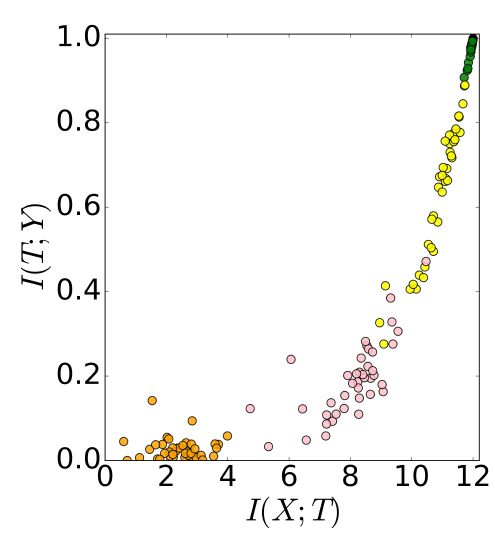

*__Grafik 1__ zeigt die Information Plane von 50 neuronalen Netzen mit jeweils 4 Schichten im Ausgangszustand.
Die Schichten sind durch 4 verschiedene Farben codiert. Die erste Schicht wird in Grün dargestellt, die letzte (Output) Schicht in Orange.*

Grafik 1 zeigt eine beispielhafte Darstellung der Information Plane für ein Netz mit 4 Schichten. Erkennbar ist, dass im initialen Zustand die erste Schicht fast 

### Animierte Darstellung

Das folgende Video von Shwartz-Ziv zeigt eine animierte Darstellung der Informationplane während des Trainingsprozesses. Die Punkte in Orange stellen die MI der letzten Schicht dar, während die blauen Punkte in der rechten oberen Ecke die erste Schicht darstellen. 

In [5]:
from IPython.display import HTML, IFrame

IFrame(src="https://www.youtube.com/embed/P1A1yNsxMjc", width=560, height=315)

_*Hinweis* In der unteren Hälfte des Videos scheint das Diagramm falsch beschriftet zu sein. Während des Trainingsprozesses muss die Accuracy natürlich steigen._

## Phasen des Lernens

Aus ihren Beobachtungen und Experimenten leiten Shwartz-Ziv und Tishby ab, dass der Lernprozess eines SGD-trainierten DNN in zwei Phasen abläuft. 
In der ersten Phase steigen sowohl $I(X;T)$ als auch $I(T;Y)$ relativ gleichmäßig an. Diese Phase wird von Tishby als "Fitting Phase" bezeichnet, das Modell passt sich den Trainingsdaten an. Der Anpassungsprozess geschieht sehr schnell, so dass er in obigem Video schon nach ca. 650 Epochen abgeschlossen ist. Verbunden ist diese erste Phase mit einem schnellen Anstieg der Accuracy.

In der zweiten Phase steigt der Informatinsgehalt über die Labels weiter, während $I(X;T)$ suksesive abnimmt. Verbunden ist diese Verringerung mit einer deutlich langsameren, aber stetigen, Verbesserung der Accuracy. 
Durch die Abnahme von $I(X;T)$ entsteht ein gewollter Informationsverlust, daher nennt Tishby diese Phase auch "Representation Compression Phase". Da trotz Informationsverlust die Accuracy steigt, scheint es sich bei den Verlorenen Informationen nicht um relevante Informationen zu handeln. 

Diese Fokussierung auf Features, die für eine Generalisierung wichtig sind, ist für Tishby der entscheidende Faktor für den großen Erfolg Neuronaler Netze: "The most important part of learning is actually forgetting." [T] Während die Erste Phase noch ein erwartbares Verhalten ist, überrascht die zweite Phase schon eher, da keine expliziten Regularisierungstechniken eingesetzt werden. Folglich muss 

### Overfitting

Shwartz-Ziv und Tishby haben diese Phasen auch für kleinere Teilmengen der originalen Trainingsdaten analysiert (Grafik 2). Während das Bild bei 85% der Eingabedaten noch nahezu identisch zu den vollständigen Trainingsdaten ist, unterscheidet sich die Komprimierungsphase doch erheblich. Die Repräsentation der Trainingsdaten verliert nicht nur den Bezug zu den Eingabedaten, sondern auch den Zusammenhang zu den Labels. Tishby interpretiert dieses Verhalten als Overfitting, da während der Komprimierung nicht nur das Rauschen sondern auch relevante Features vergessen werden. Es fehlen in diesem Fall einfach Trainingsdaten für eine korrekte Unterscheidung der Features vom Rauschen. 



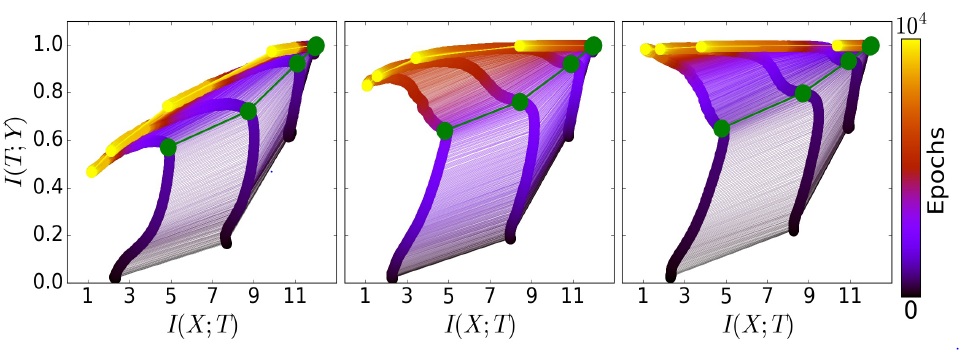

*__Grafik 2__ zeigt die Trainingsdynamiken für 3 verschiedene Teilmengen der vollständigen Trainingsdaten. Links 5%, Mittig 45% und Rechts 85%. Trainiert wurden 10 000 Epochen mit SGD. Das Netz hat eine Layerstruktur von: input-12-10-8-6-4-2-1-output*

## Umsetzung

Der Quellcode von Shwartz-Ziv und Tishby steht bei Github(https://github.com/ravidziv/IDNNs) bereit und kann zur Durchführung eigener Experiemente genutzt werden.

Der unten stehede Quellcode nutzt das bereitgestellte Framework und erstellt und trainiert ein DNN. Anschließend wird Episodenweise die Transinformation der Layer berechnet und auf der Informationenplane dargestellt. 

Building the network
Loading Data...
sampleLen 1
nDistSmpls 1
layerSizes 10,7,5,4,3
nEpoch 5000
batch 512
nRepeats 1
nEpochInds 265
LastEpochsInds 4998
DataName var_u
lr 0.0004
train_samples [80.]
CPUs 16
directory net_sampleLen=1_nDistSmpls=1_layerSizes=10,7,5,4,3_nEpoch=5000_batch=512_nRepeats=1_nEpochInds=265_LastEpochsInds=4998_DataName=var_u_lr=0.0004
Start running the network
Training network  - 0_0_0_0
Epoch 1 - Test Accuracy: 0.677 Train Accuracy: 0.531
Epoch 500 - Test Accuracy: 0.891 Train Accuracy: 0.903
Epoch 999 - Test Accuracy: 0.913 Train Accuracy: 0.930
Epoch 1498 - Test Accuracy: 0.935 Train Accuracy: 0.962
Epoch 1997 - Test Accuracy: 0.956 Train Accuracy: 0.976
Epoch 2496 - Test Accuracy: 0.957 Train Accuracy: 0.982
Epoch 2995 - Test Accuracy: 0.957 Train Accuracy: 0.984
Epoch 3494 - Test Accuracy: 0.960 Train Accuracy: 0.987
Epoch 3993 - Test Accuracy: 0.962 Train Accuracy: 0.989
Epoch 4492 - Test Accuracy: 0.961 Train Accuracy: 0.990
Epoch 4991 - Test Accuracy: 0.96

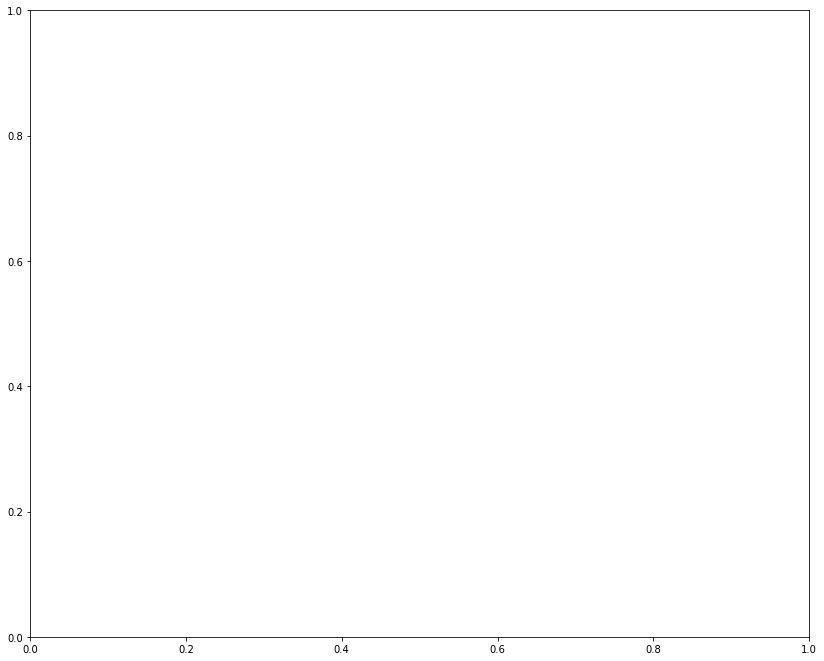

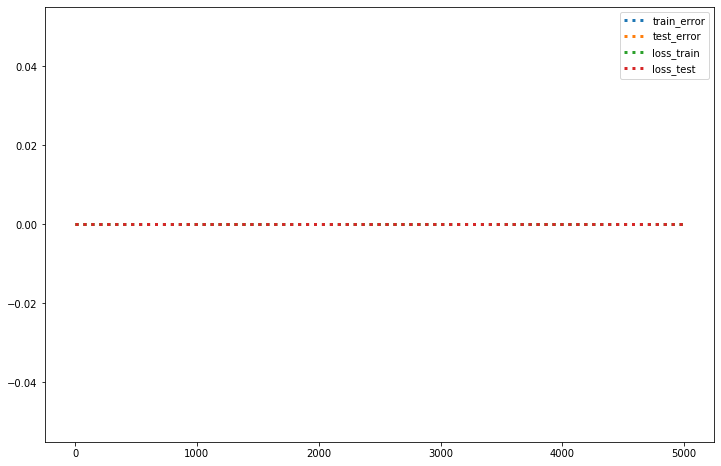

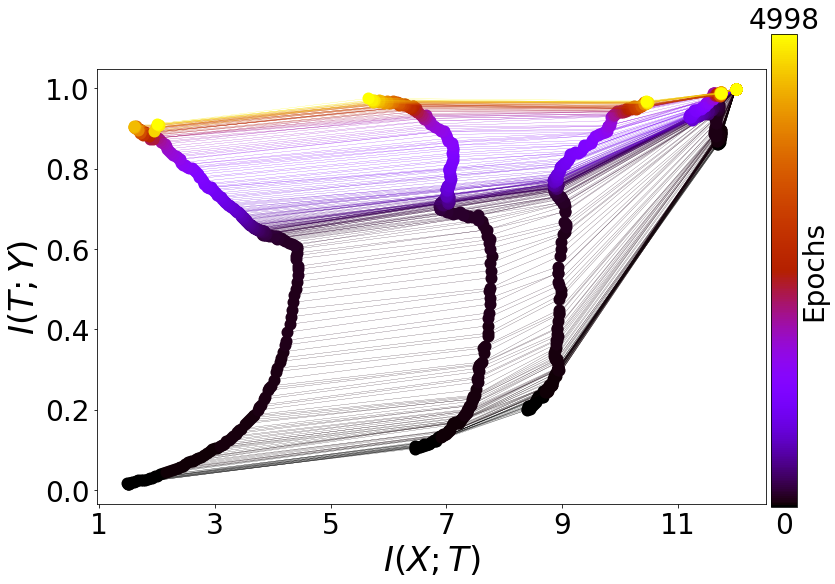

In [3]:
import tensorflow as t
t.get_logger().setLevel('ERROR')

from idnns.networks import information_network as inet, network_paramters
import sys
%matplotlib inline


def main():
    #Bulid the netowrk
    print ('Building the network')
    sys.argv = ['foo']
    args = network_paramters.get_default_parser(None)
    args.num_ephocs = 5000
    args.interval_information_display = 1
    args.data_dir = 'IDNNs/data/' 
    args.net_type = '1'
    net = inet.informationNetwork(args=args)
    net.print_information()
    print ('Start running the network')
    net.run_network()
    print ('Saving data')
    net.save_data()
    print ('Ploting figures')
    #Plot the newtork
    net.plot_network(mode=2)
    
#     global ws, data
#     ws  = net.ws
#     data = net.data_sets


main()


### Detaillierte Berechnung

Eine detailliete Berechung der MI für ein minimales Netzwerk findet sich in dem folgenden Notebook: [MI Berechnung](./mutual_calculation.ipynb)

## Diskussion

Die Schlussfolerungen von Schwartz-Ziv und Tishby[1] sind nicht unumstritten. 
Saxe et al[S] kritisieren insbesondere, dass die zweite Phase, die Kompressionsphase, nur bei der von Shwartz-Ziv und Tishby verwendeten Sigmoid Aktivierungsfunktion auftritt. In ihren eigenen Experimenten mit der häufiger verwendeten ReLU-Funktion konnten sie die Komprimierungsphase nicht reproduzieren. (Bild einfügen)



Binning für ReLU nicht ohne weiteres möglich, Tishby entgegnet, die können kein MI berechnen....

In einer neuren Veröffentlichung von ... wird ein neuer Estimator für die Transinformation vorgestellt, der sogenannte EDGE Estimator. In den Tests der Autoren wurde auch das Thema Kompressionsphase bei ReLU-DNN adressiert und mittels des EDGE Estimators auch hier eine Kompressionsphase nachgewiesen. 

## EDGE Estimation

Der

In [15]:
from EDGE import EDGE_4_3_1



In [17]:
t = ws[0][0][0][0][0]
x = data.data

EDGE_4_3_1.EDGE(x, t)

1.6666105219247078

# Referenzen

[1] R. Shwartz-Ziv und N. Tishby, „Opening the Black Box of Deep Neural Networks via Information“, arXiv:1703.00810 [cs], März 2017, Zugegriffen: Juli 02, 2019. [Online]. Verfügbar unter: http://arxiv.org/abs/1703.00810.

[2] N. Tishby und N. Zaslavsky, „Deep Learning and the Information Bottleneck Principle“, arXiv:1503.02406 [cs], März 2015, Zugegriffen: Mai 25, 2020. [Online]. Verfügbar unter: http://arxiv.org/abs/1503.02406.

[S] A. M. Saxe u. a., „On the Information Bottleneck Theory of Deep Learning“, Feb. 2018, Zugegriffen: Okt. 25, 2019. [Online]. Verfügbar unter: https://openreview.net/forum?id=ry_WPG-A-&noteId=ry_WPG-A-.

[T]N. Wolchover, „New Theory Cracks Open the Black Box of Deep Learning“, Quanta Magazine. https://www.quantamagazine.org/new-theory-cracks-open-the-black-box-of-deep-learning-20170921/ (zugegriffen Juli 02, 2019).
